### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

### Load data

In [2]:
# Read the dataset
df = pd.read_csv('emotions.csv')
df.head()

,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness


In [3]:
df.info

<bound method DataFrame.info of                                                     text    label
0      i feel so pissed off over an old friend and so...    anger
1      ive found it has made a huge difference especi...    anger
2      i also feel it is unfortunate that nearly all ...  sadness
3                       i feel petty a href http clairee    anger
4      i used to believe that a feeling like fear was...  sadness
...                                                  ...      ...
19995  i was i might be buying stuff from there but i...      joy
19996  i like sonam deepika and genelia who i feel ar...      joy
19997  i feel pathetic that i can hardly go a whole d...  sadness
19998  id have spent more time with her on reading i ...  sadness
19999  i do however feel like one of those pathetic g...  sadness

[20000 rows x 2 columns]>

In [4]:
# unique labels
labels_name= df['label'].unique()
labels_name

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

In [5]:
# Number of classes
num_of_classes = len(labels_name)
print('Total count of the unique labels are ',num_of_classes)

Total count of the unique labels are  6


### Preprocessing

In [6]:
# Tokenization
max_words = 20000
tokenizer = Tokenizer(num_words=max_words,oov_token="<OOV>")

# fit the tokenizer on text data to build vocabulary
tokenizer.fit_on_texts(df['text'])

# Convert text to sequnces of integers
X = tokenizer.texts_to_sequences(df['text'])
print(X[0])

[2, 3, 15, 514, 162, 116, 77, 275, 278, 4, 69, 179]


In [7]:
# Padding the sequences to uniform lengths
maxlen=100
X = pad_sequences(X, padding='post', maxlen=maxlen)
print('Pad sequnce')
print(X)

vocab_size = len(tokenizer.word_index) + 1 # adding 1 for token padding (i.e. index zero)
print('Vocabulary size',vocab_size)


Pad sequnce
[[  2   3  15 ...   0   0   0]
 [ 74 323  13 ...   0   0   0]
 [  2 117   3 ...   0   0   0]
 ...
 [  2   3 580 ...   0   0   0]
 [248  20 405 ...   0   0   0]
 [  2  39 599 ...   0   0   0]]
Vocabulary size 17098


In [8]:
list(tokenizer.word_index.items())[:20]

[('<OOV>', 1),
 ('i', 2),
 ('feel', 3),
 ('and', 4),
 ('to', 5),
 ('the', 6),
 ('a', 7),
 ('feeling', 8),
 ('that', 9),
 ('of', 10),
 ('my', 11),
 ('in', 12),
 ('it', 13),
 ('like', 14),
 ('so', 15),
 ('im', 16),
 ('for', 17),
 ('me', 18),
 ('was', 19),
 ('have', 20)]

In [9]:
# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])
print(y)

#One-Hot Encode the labels
y = to_categorical(y)
print(y)

[0 0 4 ... 4 4 4]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [10]:
#train,test-split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of the training data: {x_train.shape},{y_train.shape}')
print(f'Shape of the test data: {x_test.shape},{y_test.shape}')
print(f'Shape of the test data: {x_val.shape},{y_val.shape}')


Shape of the training data: (12800, 100),(12800, 6)
Shape of the test data: (4000, 100),(4000, 6)
Shape of the test data: (3200, 100),(3200, 6)


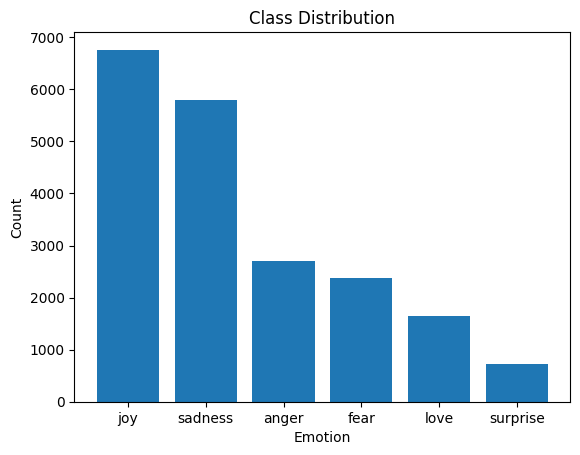

label
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64


In [11]:
# Check the distribution of samples across different classes
class_distribution = df['label'].value_counts()

# Plot a bar chart to visualize class distribution
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

print(class_distribution)


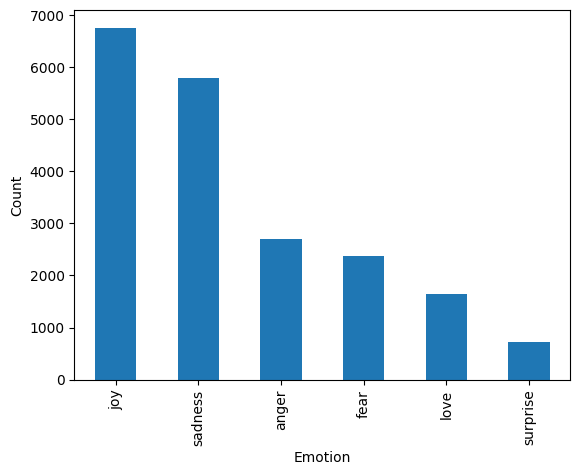

In [13]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


### Create model

In [14]:
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128, activation='tanh', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  
    Dense(num_of_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


### Train the model

In [15]:


history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val)) 

Epoch 1/10


400/400 [==============================] - 73s 170ms/step - loss: 1.6089 - accuracy: 0.3280 - val_loss: 1.5918 - val_accuracy: 0.3344
Epoch 2/10
400/400 [==============================] - 60s 149ms/step - loss: 1.5804 - accuracy: 0.3339 - val_loss: 1.5973 - val_accuracy: 0.3344
Epoch 3/10
400/400 [==============================] - 60s 149ms/step - loss: 1.5786 - accuracy: 0.3337 - val_loss: 1.5998 - val_accuracy: 0.2834
Epoch 4/10
400/400 [==============================] - 59s 149ms/step - loss: 1.5820 - accuracy: 0.3303 - val_loss: 1.5980 - val_accuracy: 0.3344
Epoch 5/10
400/400 [==============================] - 58s 146ms/step - loss: 1.5752 - accuracy: 0.3347 - val_loss: 1.5908 - val_accuracy: 0.3344
Epoch 6/10
400/400 [==============================] - 66s 165ms/step - loss: 1.5754 - accuracy: 0.3345 - val_loss: 1.5922 - val_accuracy: 0.3344
Epoch 7/10
400/400 [==============================] - 63s 158ms/step - loss: 1.5744 - accuracy: 0.3305 - val_loss: 1.5944 - val_

### Visualize the model performance

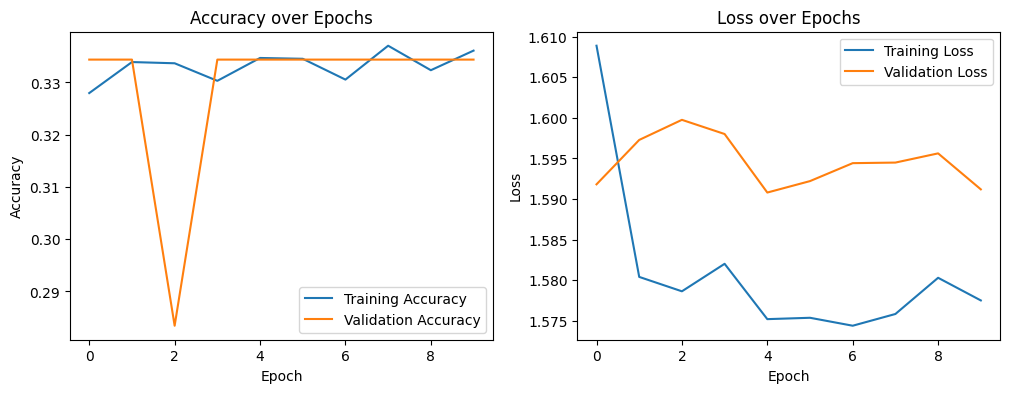

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Evaluate on the test set

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

125/125 - 6s - loss: 1.5699 - accuracy: 0.3422 - 6s/epoch - 44ms/step
Test Loss: 1.5699
Test Accuracy: 0.3422


In [18]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

125/125 [==============================] - 7s 48ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       530
           1       0.00      0.00      0.00       496
           2       0.34      1.00      0.51      1369
           3       0.00      0.00      0.00       326
           4       0.00      0.00      0.00      1149
           5       0.00      0.00      0.00       130

    accuracy                           0.34      4000
   macro avg       0.06      0.17      0.08      4000
weighted avg       0.12      0.34      0.17      4000



c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

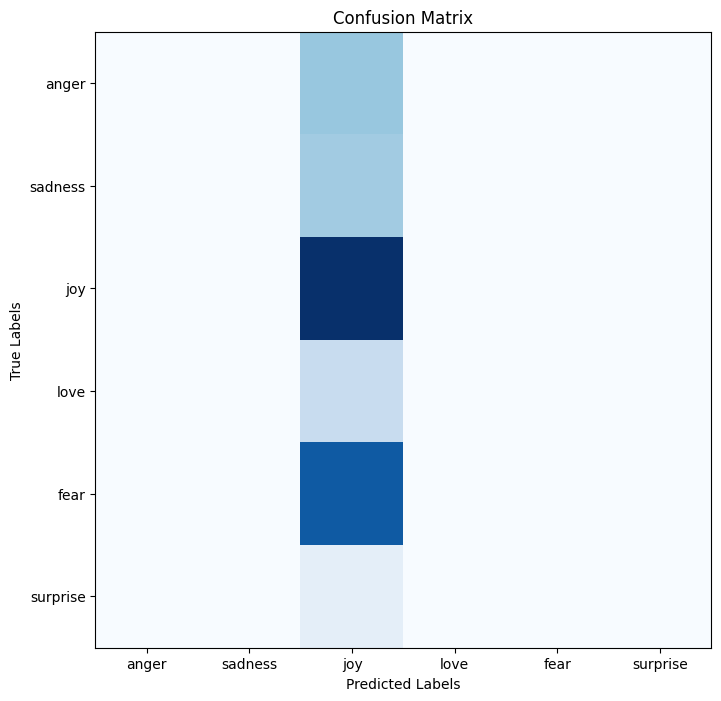

In [19]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(num_of_classes), labels_name)  
plt.yticks(np.arange(num_of_classes), labels_name)  
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()